In [10]:
from fine_tuning_tabpfn.finetune_tabpfn import fine_tune_tabpfn
# from tabpfn.model.gatedtransformerv2 import GatedPerFeatureTransformer
from tabpfn.model.gatedtransformer import GatedPerFeatureTransformer

In [11]:
from fine_tuning_tabpfn.finetune_tabpfn import fine_tune_tabpfn
from sklearn.datasets import load_iris, load_wine, fetch_openml,load_digits, load_breast_cancer
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from tabpfn.classifier import TabPFNClassifier
import torch.nn as nn
import torch
from sklearn.metrics import accuracy_score,precision_score,recall_score
import numpy as np
import pandas as pd


In [12]:
# Load data
# X, y = load_wine(return_X_y=True, as_frame=True)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
# Load MNIST from OpenML; as_frame=True returns a Pandas DataFrame.
# mnist = fetch_openml('mnist_784', version=1, as_frame=True)
# X, y = mnist["data"], mnist["target"]
# y = y.astype(int)
# digits = load_digits()
# X, y = pd.DataFrame(digits.data), pd.Series(digits.target)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)

Loaded gating model for attention
Loaded Gated Model


Fine-tuning Steps:   0%| | 24/10000 [03:14<23:25:23,  8.45s/it, Best Val. Loss=0.0597, Best Val. Score=-0.0597, Trainin


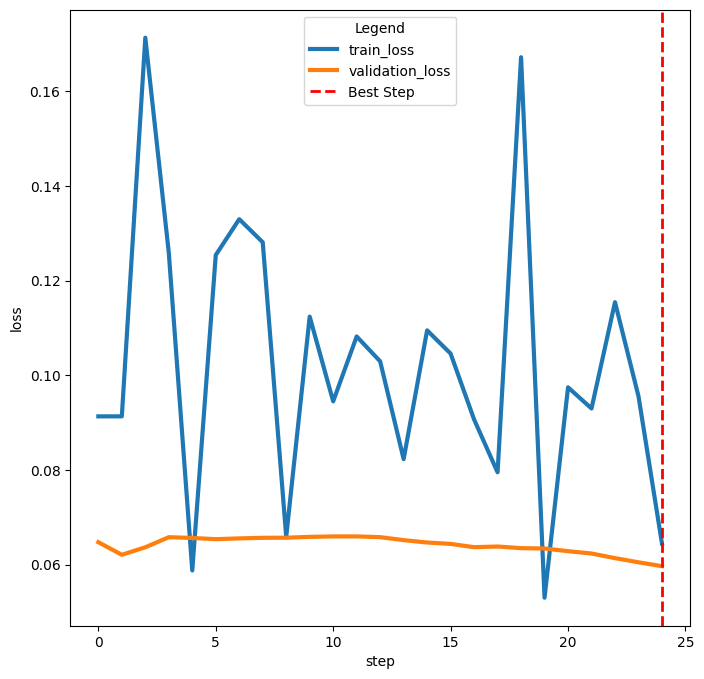

In [13]:



# Finetune
save_path_to_fine_tuned_model = "./fine_tuned_model_new_28_03_gated_bc2.ckpt"
fine_tune_tabpfn(
    path_to_base_model="auto",
    save_path_to_fine_tuned_model=save_path_to_fine_tuned_model,
    # Finetuning HPs
    time_limit=200,
    finetuning_config={"learning_rate": 0.00001, "batch_size": 8,"min_patience": 300,"max_patience": 1000},
    validation_metric="log_loss",
    # Input Data
    X_train=X_train,
    y_train=y_train,
    categorical_features_index=None,
    device="cuda",  # use "cpu" if you don't have a GPU
    task_type="multiclass",
    gated=True,
    # Optional
    show_training_curve=True,  # Shows a final report after finetuning.
    logger_level=-100,  # Shows all logs, higher values shows less
    use_wandb=False,  # Init wandb yourself, and set to True
)




In [14]:

gated_model = TabPFNClassifier(
    model_path=save_path_to_fine_tuned_model,
    gated=True
)
# Then, use gated_model in your fine-tuning pipeline.
clf = gated_model.fit(X_train, y_train)
print("Log Loss (Default):", log_loss(y_test, clf.predict_proba(X_test)))

Loaded gating model for attention
Loaded Gated Model
Log Loss (Default): 0.06619432658415117


In [15]:
accuracy_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1)),\
precision_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),\
average='weighted'),\
recall_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),average='weighted')

(0.973404255319149, 0.9735502711722985, 0.973404255319149)

## OG

In [ ]:

# Load data
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
# X, y = load_wine(return_X_y=True, as_frame=True)
# Load MNIST from OpenML; as_frame=True returns a Pandas DataFrame.
# mnist = fetch_openml('mnist_784', version=1, as_frame=True)
# X, y = mnist["data"], mnist["target"]
# y = y.astype(int)
# digits = load_digits()
# X, y = pd.DataFrame(digits.data), pd.Series(digits.target)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)

# Finetune
save_path_to_fine_tuned_model = 'base_model_bc2.ckpt'
fine_tune_tabpfn(
    path_to_base_model="auto",
    save_path_to_fine_tuned_model=save_path_to_fine_tuned_model,
    # Finetuning HPs
  time_limit=200,
    finetuning_config={"learning_rate": 0.00001, "batch_size": 8,"min_patience": 300,"max_patience": 1000},
    validation_metric="log_loss",
    # Input Data
    X_train=X_train,
    y_train=y_train,
    categorical_features_index=None,
    device="cuda",  # use "cpu" if you don't have a GPU
    task_type="multiclass",
    # Optional
    show_training_curve=True,  # Shows a final report after finetuning.
    logger_level=-100,  # Shows all logs, higher values shows less
    use_wandb=False,  # Init wandb yourself, and set to True
)




Loaded Regular Model


Fine-tuning Steps:   0%| | 9/10000 [01:06<22:22:54,  8.06s/it, Best Val. Loss=0.0635, Best Val. Score=-0.0635, Training

In [ ]:

reg_model = TabPFNClassifier(
    model_path=save_path_to_fine_tuned_model,
)
# Then, use gated_model in your fine-tuning pipeline.
clf = reg_model.fit(X_train, y_train)
print("Log Loss (Default):", log_loss(y_test, clf.predict_proba(X_test)))

In [ ]:
accuracy_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1)),\
precision_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),\
average='weighted'),\
recall_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),average='weighted')